<a href="https://colab.research.google.com/github/castudil/GIS-plan-regulador/blob/main/deteccion_de_predios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import cv2
from google.colab.patches import cv2_imshow
#from geojson import Polygon

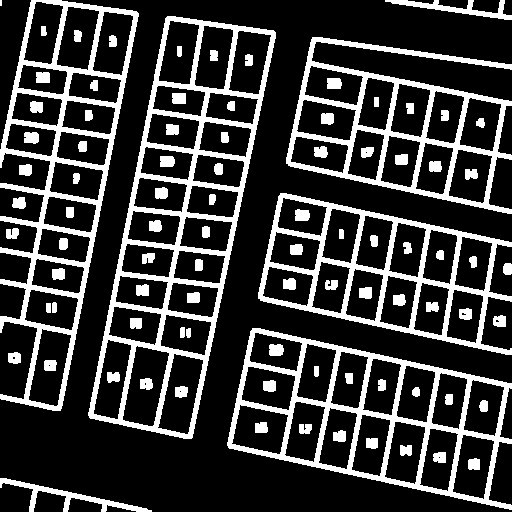

In [38]:
image = img = cv2.imread('sii_BR_CART_CURICO_WMS_3.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#thresh, black_white = cv2.threshold(gray, thresh1, thresh2, cv2.THRESH_BINARY)
canny = cv2.Canny(gray, 210, 255) #edge detection algorithm
dilated = cv2.dilate(canny, None, iterations=1) #increase the size or thickness of the foreground object in an image.
cv2_imshow(dilated)

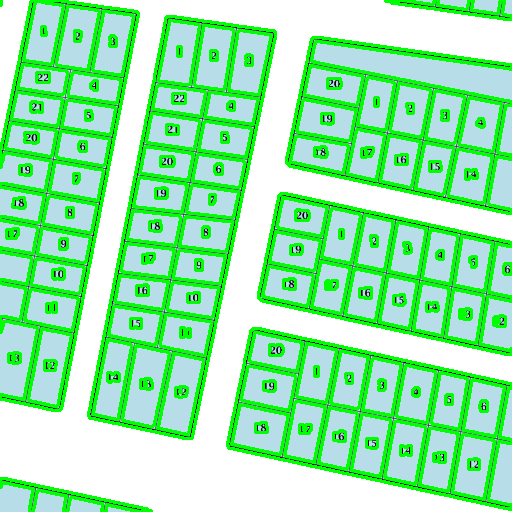

In [32]:
#contours, hierarchy = cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
img = image.copy()
cv2.drawContours(img, contours, -1, (0,255,0), 2)
cv2_imshow(img)

In [34]:
def aprroxPolygons(cnt):
    epsilon = 0.01*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    #poli = Polygon(approx.tolist())
    
    print(approx)
    print("len= ", len(approx))
    
    cv2.drawContours(image, [approx], -1, (0,255,0), 2)
    cv2_imshow(image)
    #cv2.imshow('image',image)
    #cv2.waitKey(0) 

    return approx

In [35]:
def polygons(cnt):
  print(cnt)
  print("len= ", len(cnt))
  cv2.drawContours(image, [cnt], -1, (0,255,0), 2)
  cv2_imshow(image)
   

In [36]:
def checkPolygon(cnt, hierarchy):
  area = cv2.contourArea(cnt)
  #Verifica el area del poligono, si es muy pequeño, significa que es el poligono detectado en base a los números por lo que lo ignora
  if area < 200:
    return False
  
  #En base a la jerarquía si el póligno es -1, es decir un poligono padre, lo ignora ya que sólo nos interesan los hijos
  if hierarchy[3] == -1:
    return False
  
  return True


[[[463 434]]

 [[494 441]]

 [[483 499]]

 [[452 491]]]
len=  4


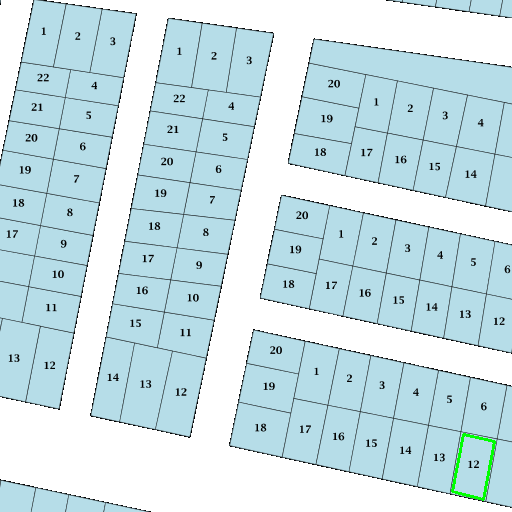

[[[430 428]]

 [[458 434]]

 [[447 491]]

 [[419 484]]]
len=  4


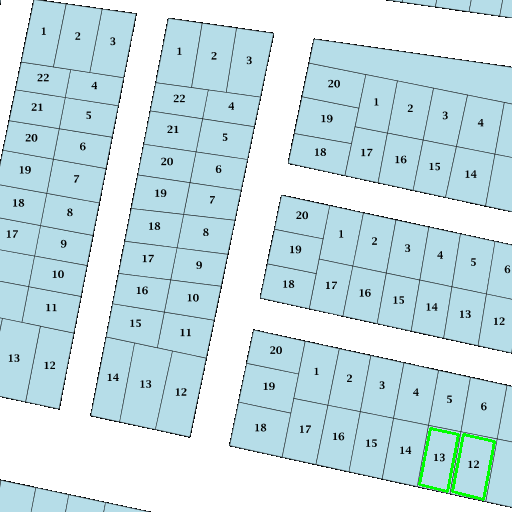

[[[395 421]]

 [[425 427]]

 [[414 484]]

 [[384 476]]]
len=  4


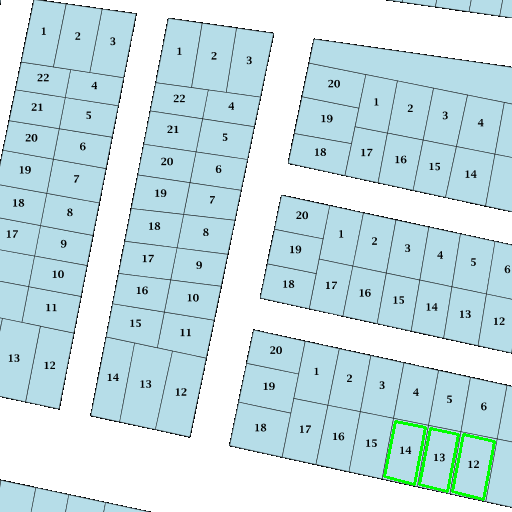

[[[362 414]]

 [[390 420]]

 [[379 476]]

 [[351 469]]]
len=  4


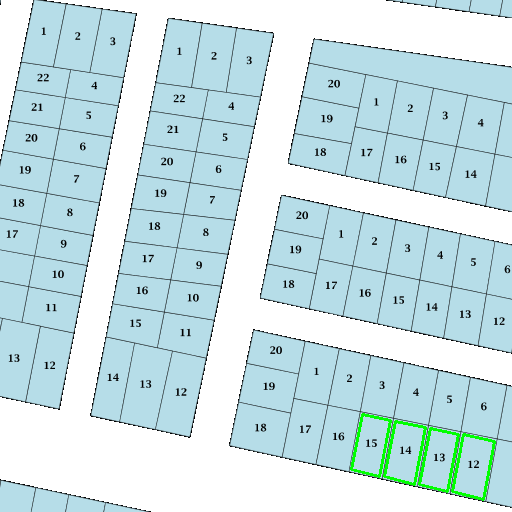

[[[330 407]]

 [[357 414]]

 [[346 469]]

 [[318 462]]]
len=  4


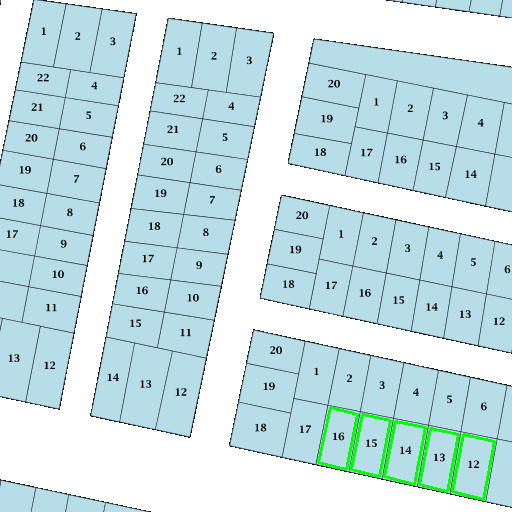

[[[240 404]]

 [[288 415]]

 [[279 454]]

 [[231 443]]]
len=  4


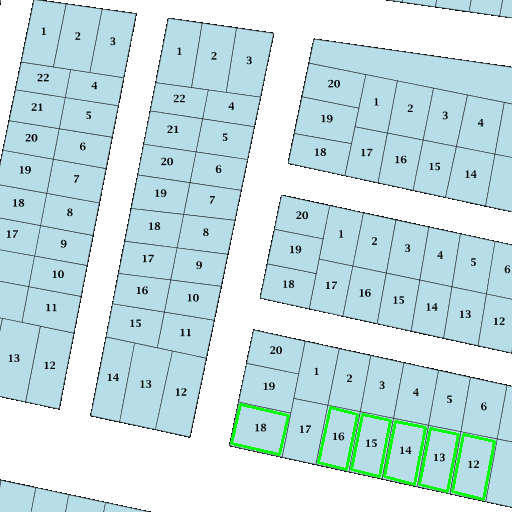

[[[296 401]]

 [[325 407]]

 [[313 462]]

 [[284 454]]]
len=  4


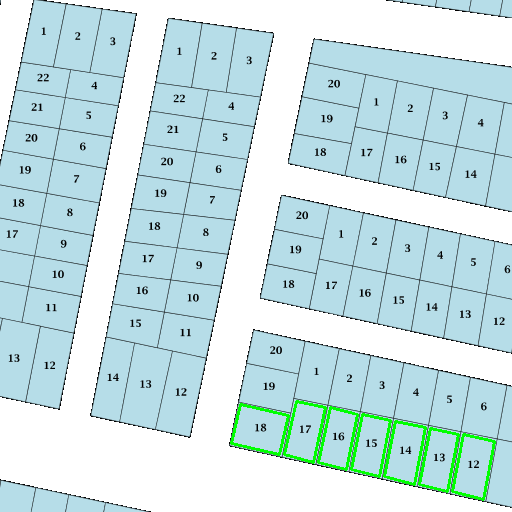

[[[473 379]]

 [[504 387]]

 [[494 436]]

 [[463 429]]]
len=  4


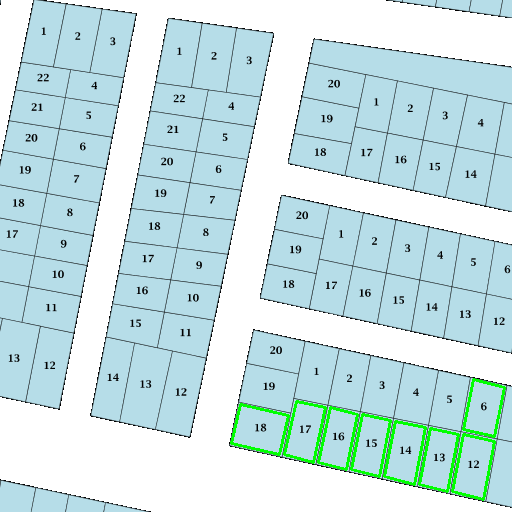

[[[441 372]]

 [[467 379]]

 [[458 429]]

 [[431 422]]]
len=  4


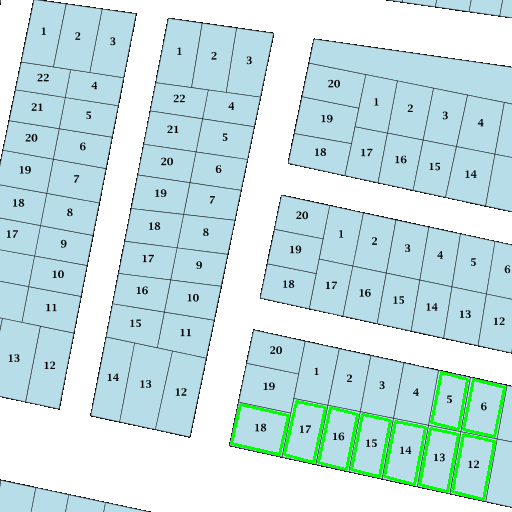

[[[248 366]]

 [[295 376]]

 [[288 410]]

 [[241 399]]]
len=  4


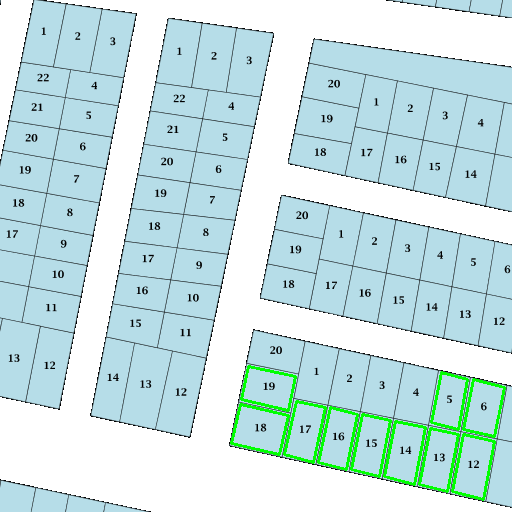

[[[406 365]]

 [[435 372]]

 [[426 422]]

 [[396 415]]]
len=  4


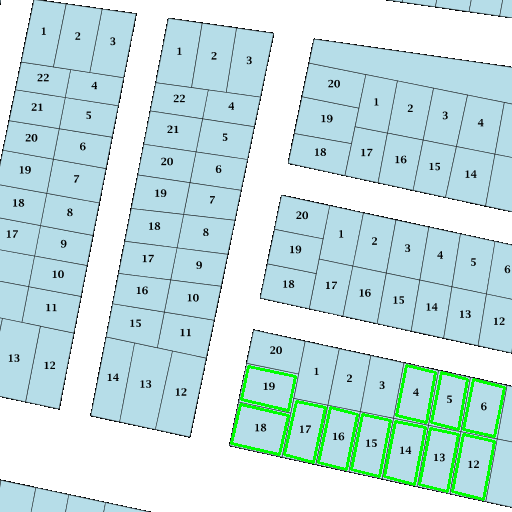

[[[373 358]]

 [[401 365]]

 [[391 415]]

 [[362 409]]]
len=  4


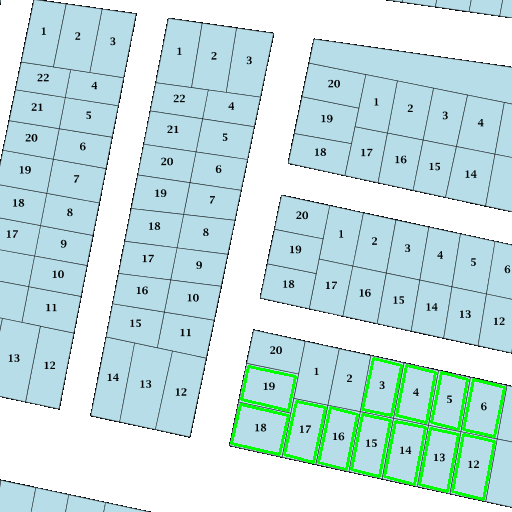

[[[341 351]]

 [[368 357]]

 [[357 408]]

 [[330 402]]]
len=  4


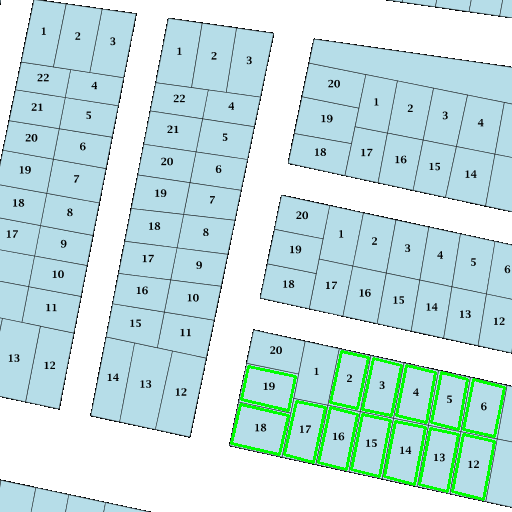

[[[307 343]]

 [[336 350]]

 [[325 402]]

 [[296 395]]]
len=  4


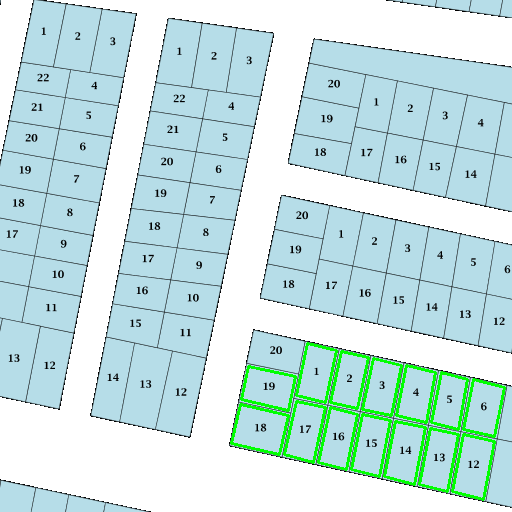

[[[254 333]]

 [[258 332]]

 [[301 342]]

 [[297 370]]

 [[251 362]]

 [[249 356]]]
len=  6


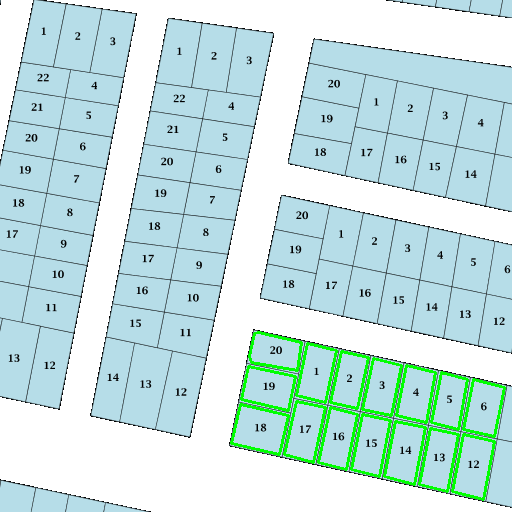

[[[454 289]]

 [[483 296]]

 [[475 343]]

 [[446 336]]]
len=  4


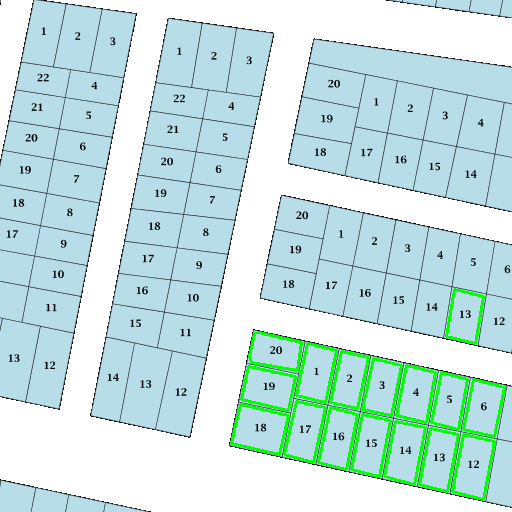

[[[422 282]]

 [[449 289]]

 [[441 335]]

 [[413 328]]]
len=  4


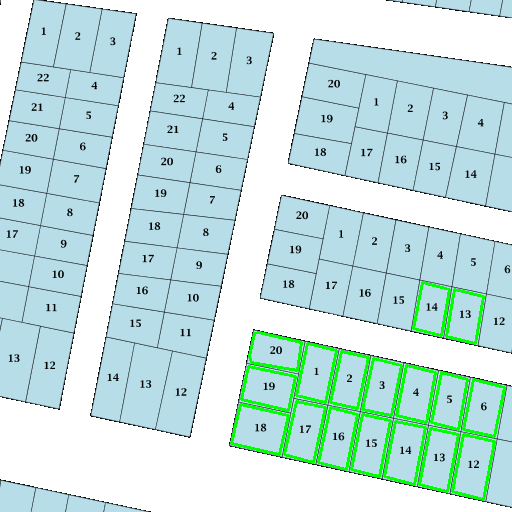

[[[388 275]]

 [[417 282]]

 [[408 328]]

 [[379 321]]]
len=  4


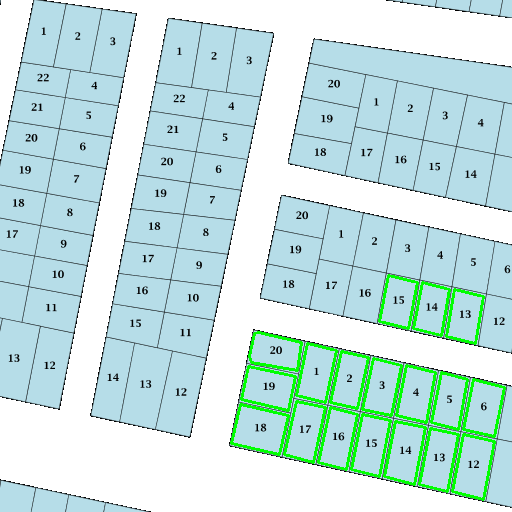

[[[355 268]]

 [[383 275]]

 [[374 321]]

 [[345 313]]]
len=  4


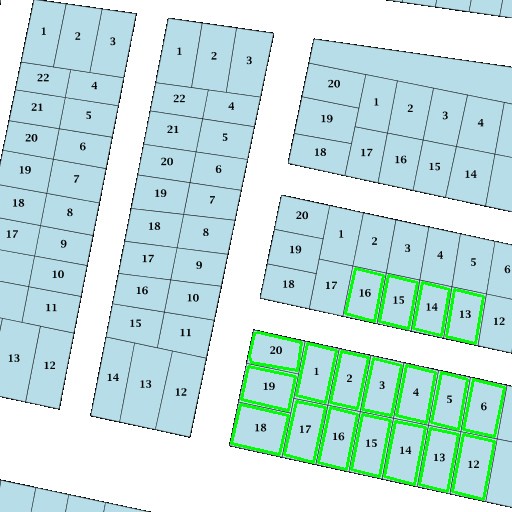

[[[268 267]]

 [[311 274]]

 [[313 278]]

 [[307 305]]

 [[263 296]]]
len=  5


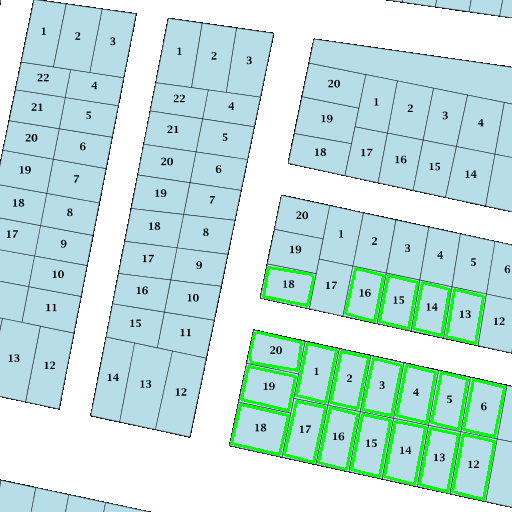

[[[321 261]]

 [[350 268]]

 [[340 313]]

 [[311 306]]]
len=  4


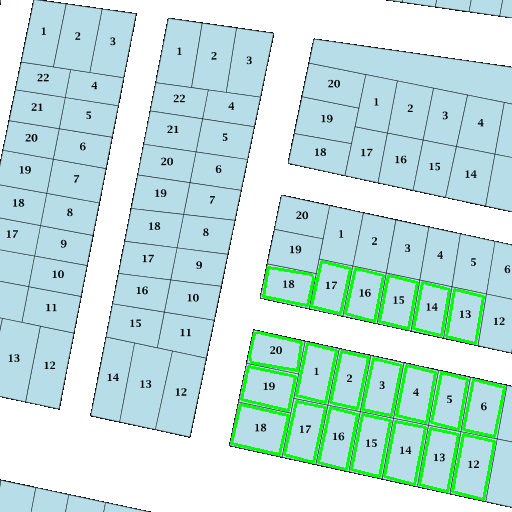

[[[462 236]]

 [[492 243]]

 [[483 291]]

 [[454 284]]]
len=  4


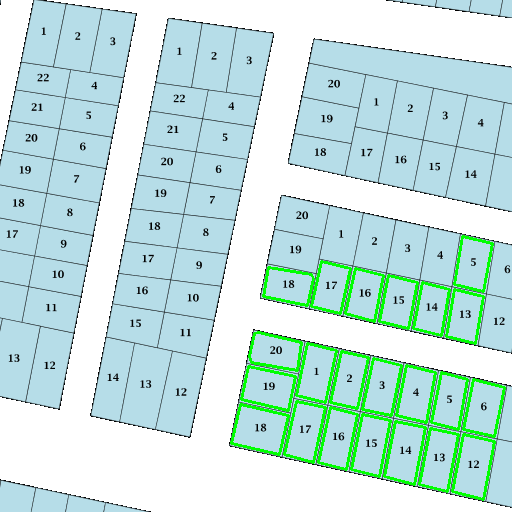

[[[275 232]]

 [[319 240]]

 [[315 268]]

 [[309 270]]

 [[270 262]]]
len=  5


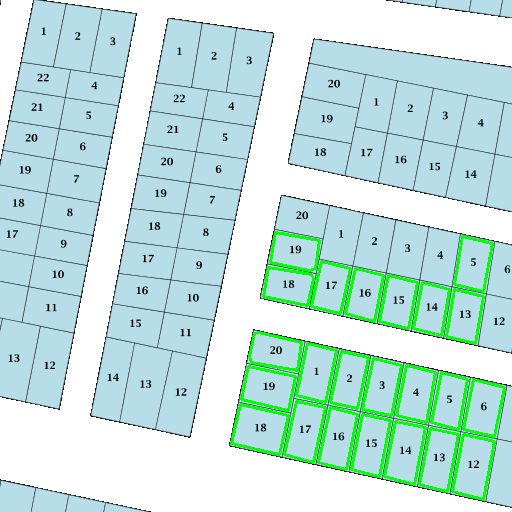

[[[431 229]]

 [[457 236]]

 [[449 284]]

 [[422 277]]]
len=  4


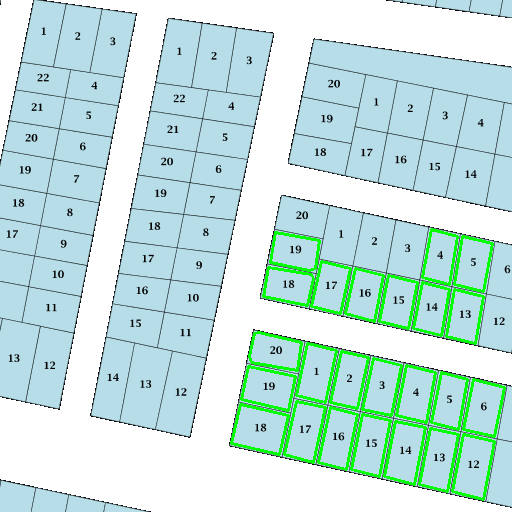

[[[398 222]]

 [[426 229]]

 [[417 277]]

 [[388 270]]]
len=  4


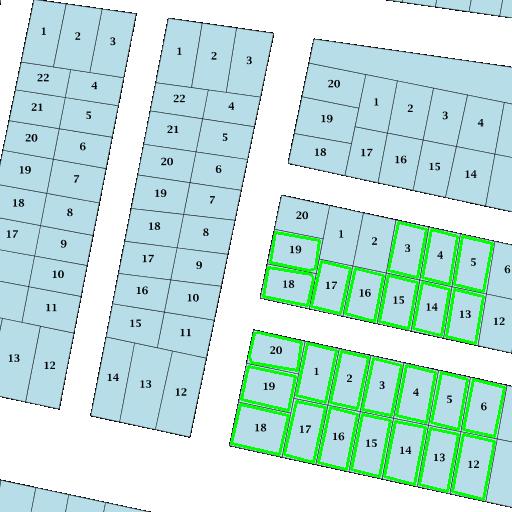

[[[365 215]]

 [[393 222]]

 [[383 270]]

 [[355 263]]]
len=  4


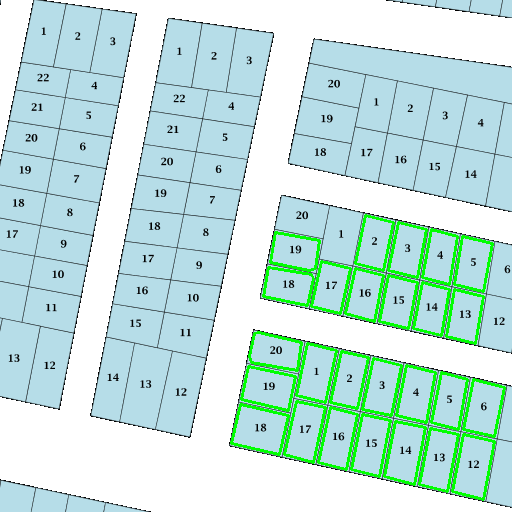

[[[332 208]]

 [[360 215]]

 [[350 263]]

 [[321 256]]]
len=  4


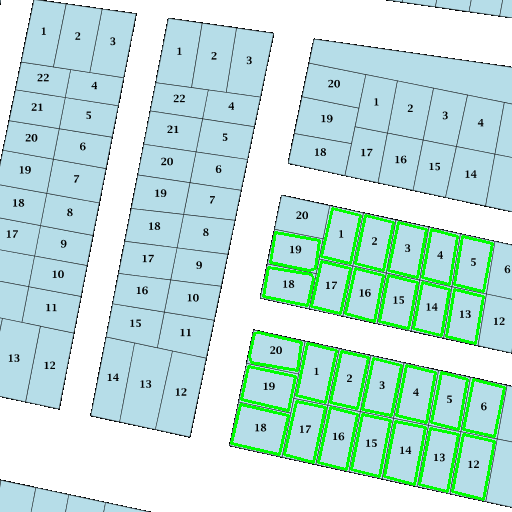

[[[282 198]]

 [[326 206]]

 [[321 235]]

 [[279 228]]

 [[277 222]]]
len=  5


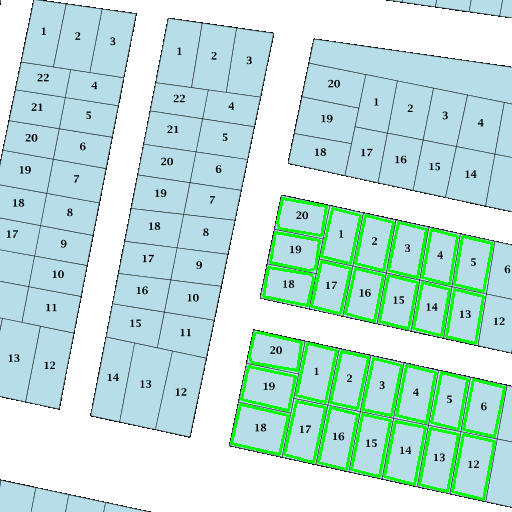

[[[458 149]]

 [[492 156]]

 [[482 203]]

 [[448 195]]]
len=  4


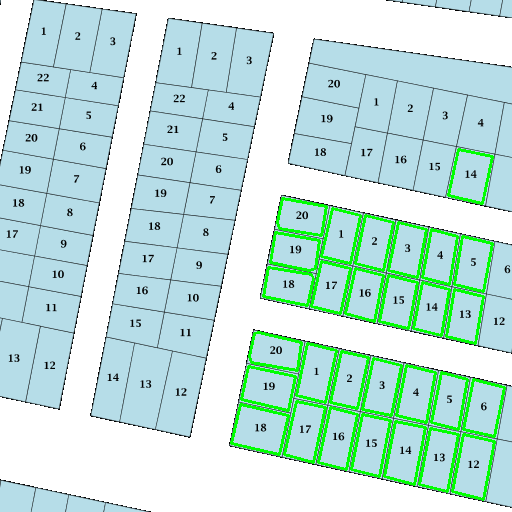

[[[425 142]]

 [[453 148]]

 [[442 194]]

 [[415 188]]]
len=  4


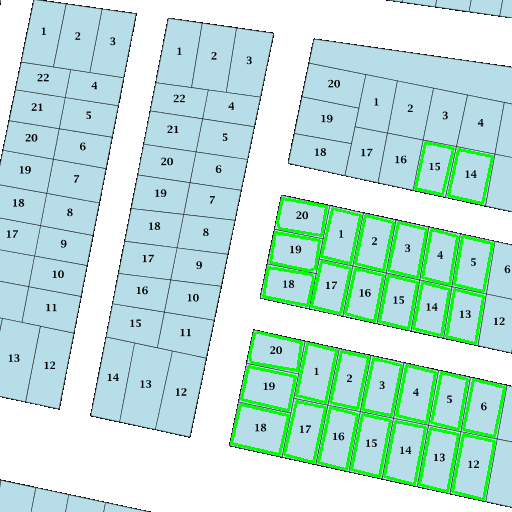

[[[295 137]]

 [[301 136]]

 [[346 144]]

 [[348 149]]

 [[343 172]]

 [[291 162]]]
len=  6


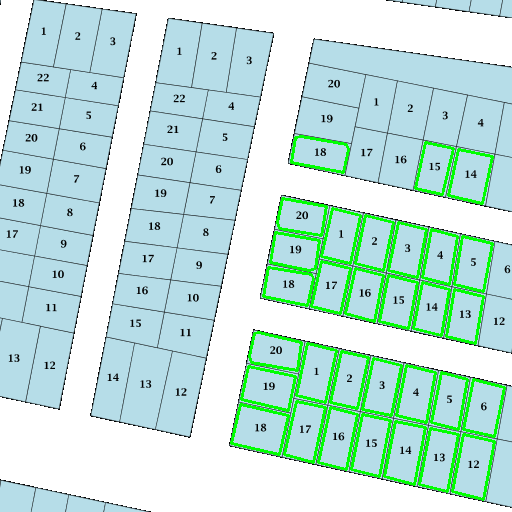

[[[389 135]]

 [[420 142]]

 [[410 187]]

 [[380 180]]]
len=  4


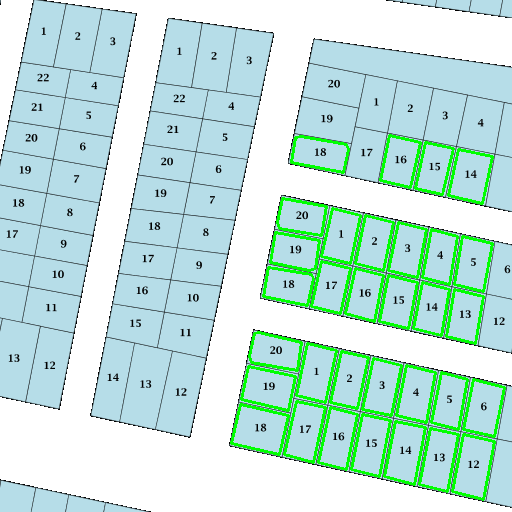

[[[357 129]]

 [[384 135]]

 [[375 180]]

 [[347 173]]]
len=  4


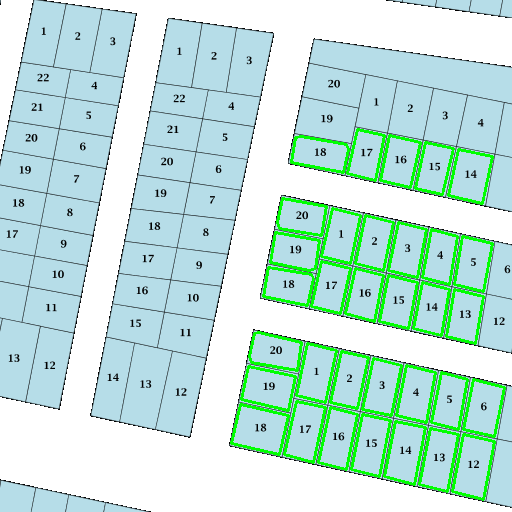

[[[302 101]]

 [[306  99]]

 [[355 109]]

 [[350 139]]

 [[343 140]]

 [[298 132]]

 [[296 130]]]
len=  7


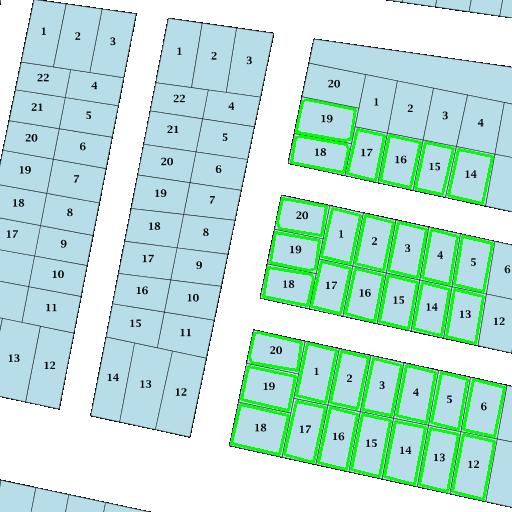

[[[470  97]]

 [[501 104]]

 [[492 151]]

 [[459 144]]]
len=  4


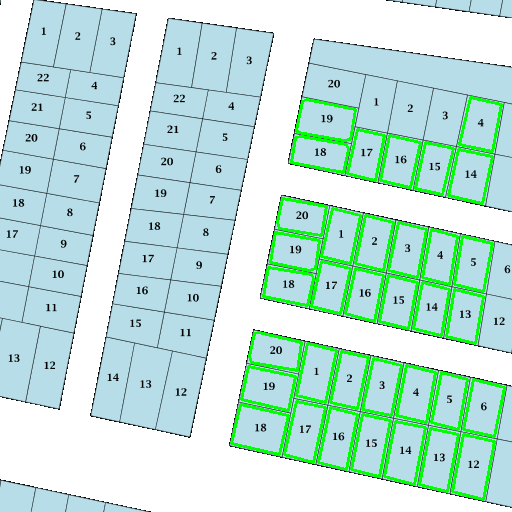

[[[436  90]]

 [[464  97]]

 [[453 143]]

 [[425 137]]]
len=  4


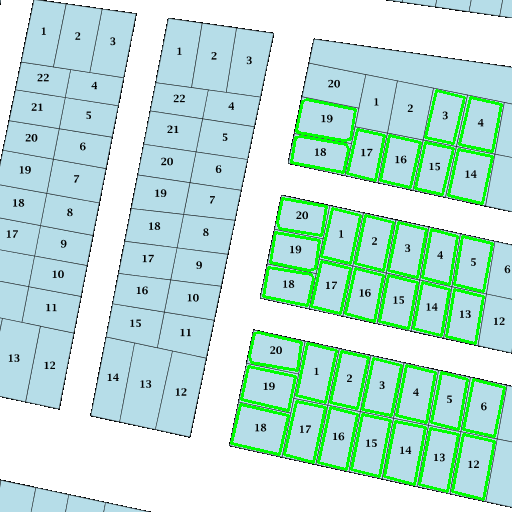

[[[399  83]]

 [[430  90]]

 [[420 137]]

 [[390 130]]]
len=  4


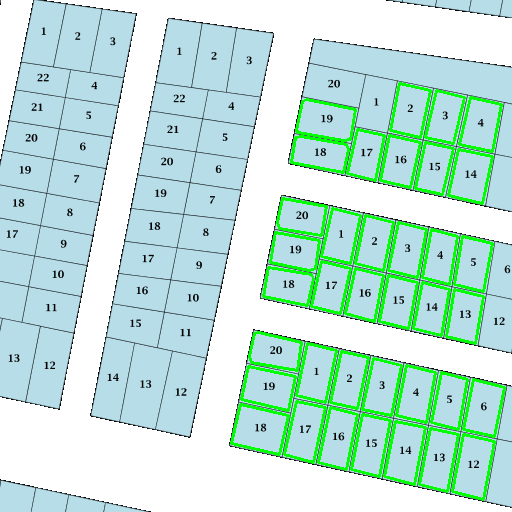

[[[368  77]]

 [[394  83]]

 [[384 130]]

 [[357 124]]]
len=  4


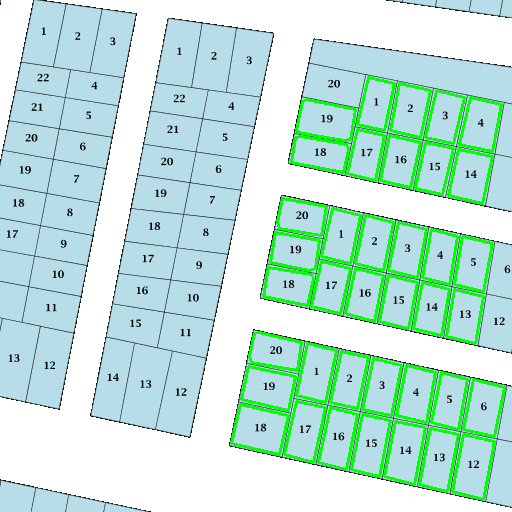

[[[310  66]]

 [[361  75]]

 [[363  77]]

 [[357 104]]

 [[305  95]]]
len=  5


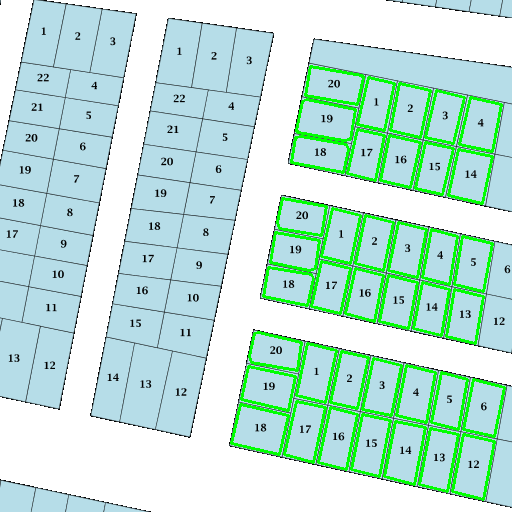

[[[174 353]]

 [[203 360]]

 [[187 434]]

 [[157 427]]]
len=  4


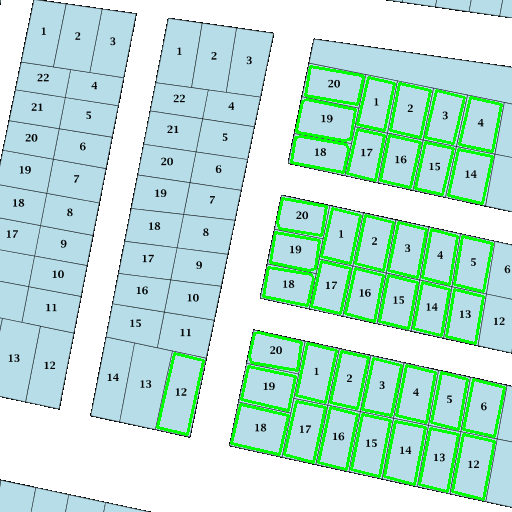

[[[137 345]]

 [[169 353]]

 [[152 426]]

 [[122 419]]]
len=  4


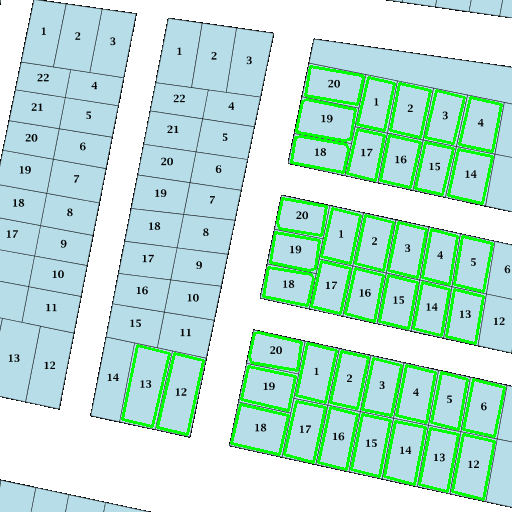

[[[108 339]]

 [[131 345]]

 [[117 419]]

 [[ 93 413]]]
len=  4


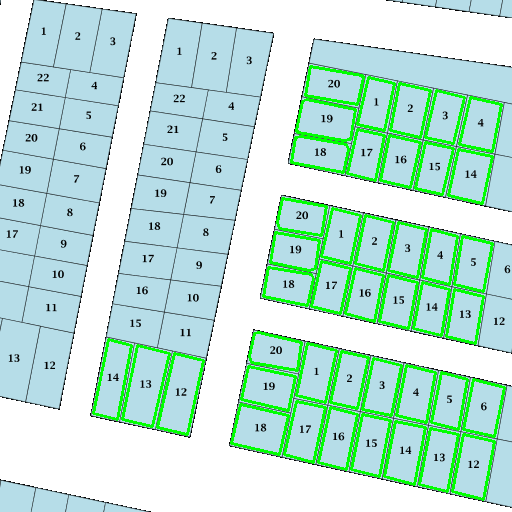

[[[165 315]]

 [[210 321]]

 [[205 354]]

 [[161 346]]

 [[160 340]]]
len=  5


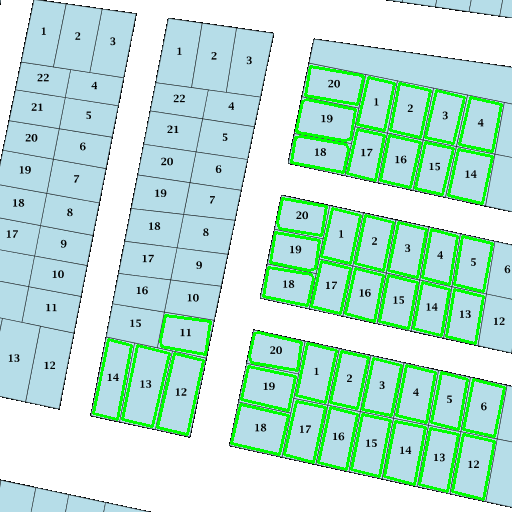

[[[113 307]]

 [[160 313]]

 [[155 344]]

 [[109 335]]]
len=  4


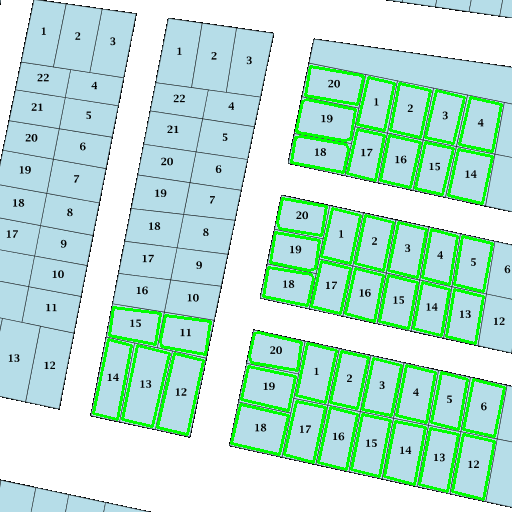

[[[172 283]]

 [[217 287]]

 [[213 315]]

 [[208 317]]

 [[168 310]]

 [[167 305]]]
len=  6


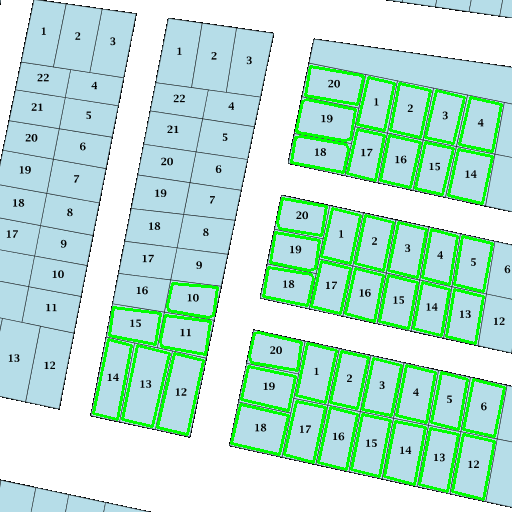

[[[119 276]]

 [[167 281]]

 [[163 307]]

 [[159 309]]

 [[116 302]]]
len=  5


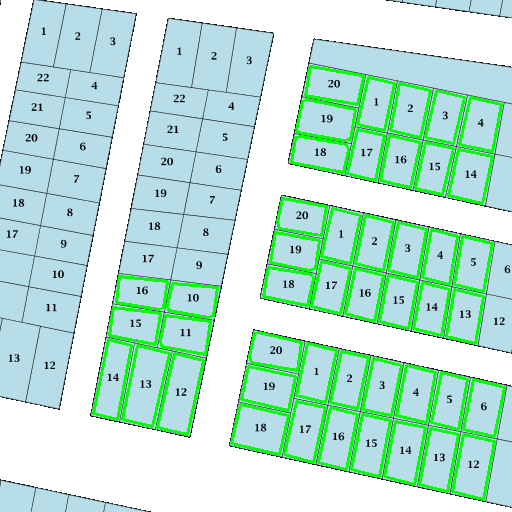

[[[178 251]]

 [[224 255]]

 [[220 282]]

 [[212 283]]

 [[174 278]]

 [[173 274]]]
len=  6


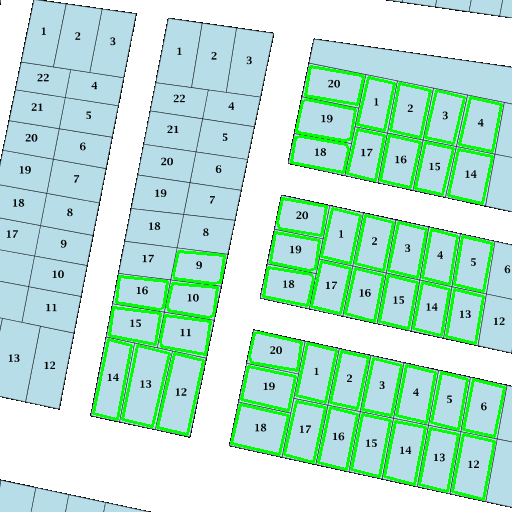

[[[126 244]]

 [[173 249]]

 [[169 276]]

 [[122 271]]

 [[121 266]]]
len=  5


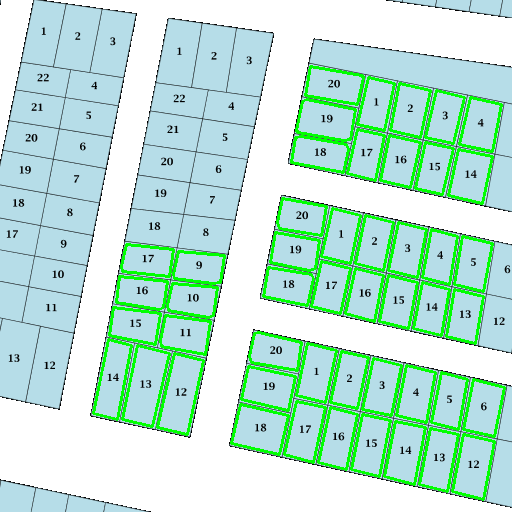

[[[185 217]]

 [[231 221]]

 [[226 250]]

 [[180 246]]]
len=  4


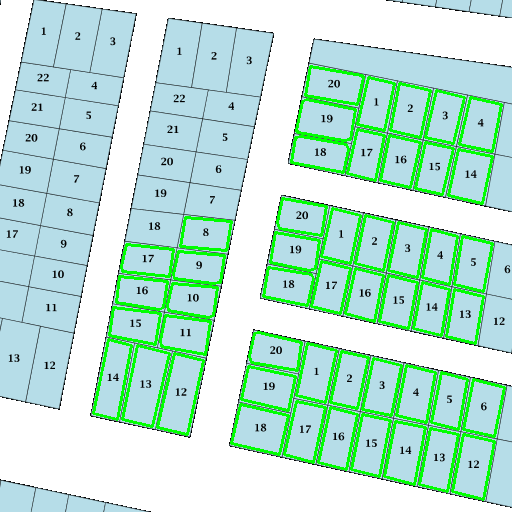

[[[132 211]]

 [[178 215]]

 [[180 221]]

 [[175 244]]

 [[128 239]]]
len=  5


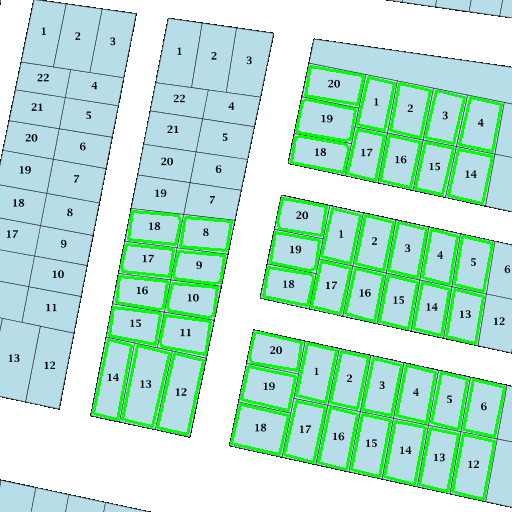

[[[191 186]]

 [[197 185]]

 [[237 191]]

 [[238 195]]

 [[233 216]]

 [[225 217]]

 [[187 212]]]
len=  7


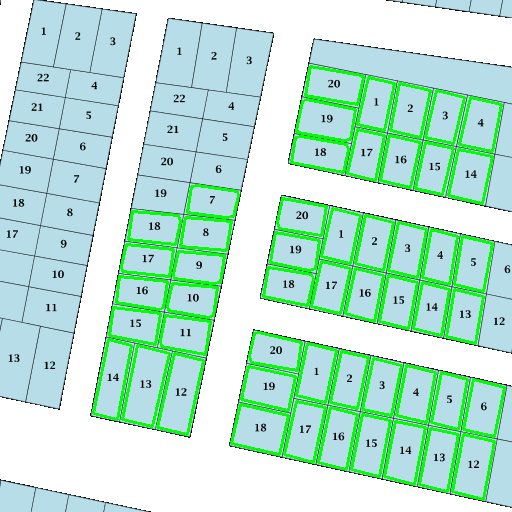

[[[138 179]]

 [[143 177]]

 [[186 184]]

 [[182 211]]

 [[134 206]]]
len=  5


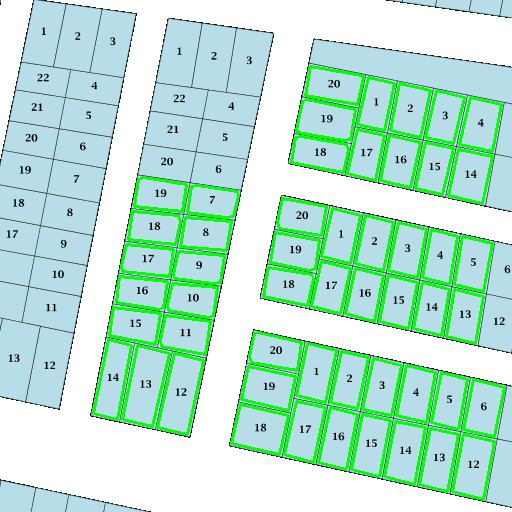

[[[197 155]]

 [[202 154]]

 [[242 160]]

 [[244 166]]

 [[240 185]]

 [[234 187]]

 [[193 181]]]
len=  7


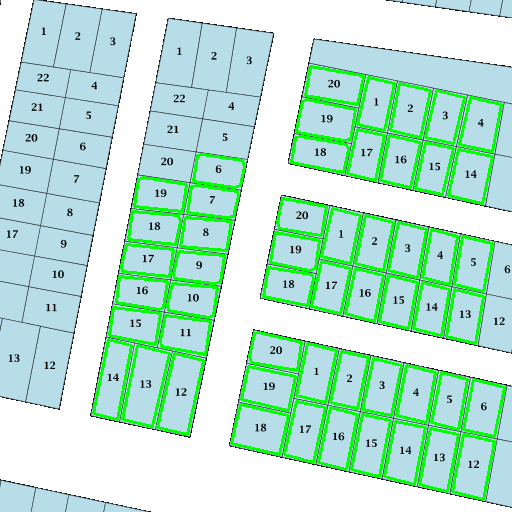

[[[144 148]]

 [[147 146]]

 [[192 153]]

 [[188 179]]

 [[141 173]]]
len=  5


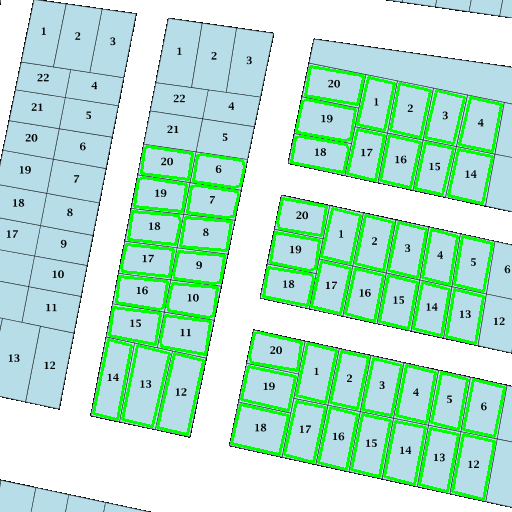

[[[203 123]]

 [[209 121]]

 [[250 128]]

 [[246 156]]

 [[199 150]]]
len=  5


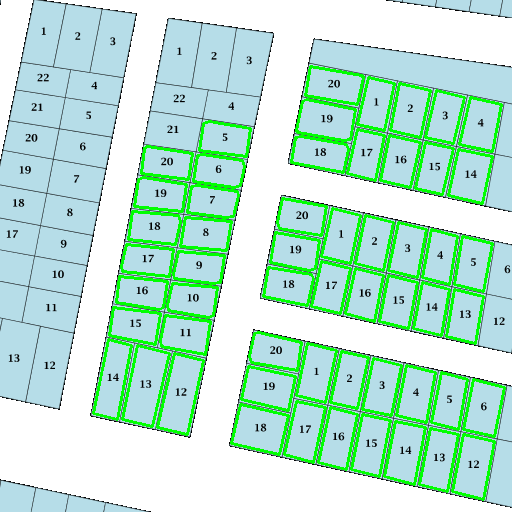

[[[151 114]]

 [[156 113]]

 [[198 120]]

 [[199 125]]

 [[194 148]]

 [[147 142]]]
len=  6


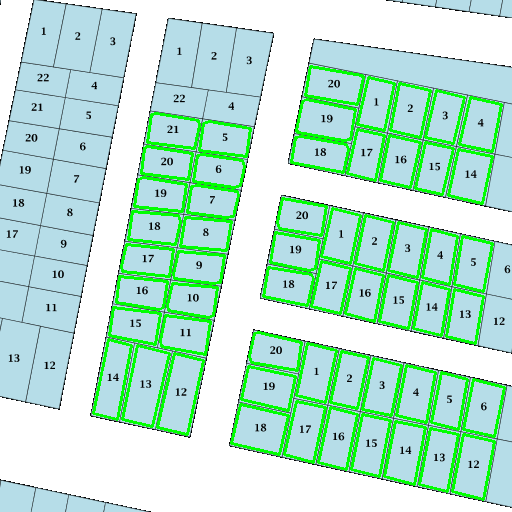

[[[209  93]]

 [[257  98]]

 [[253 123]]

 [[206 117]]]
len=  4


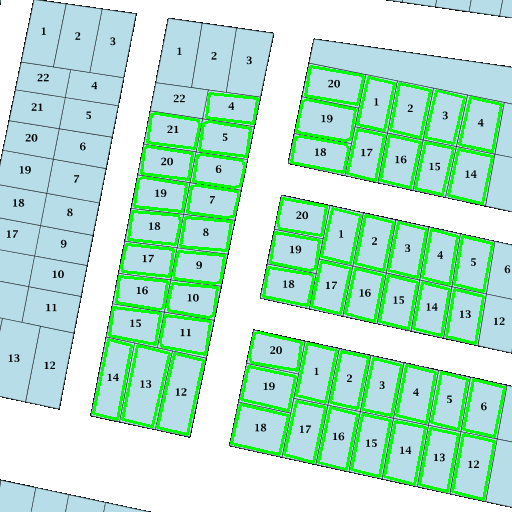

[[[156  87]]

 [[164  85]]

 [[204  91]]

 [[201 115]]

 [[153 109]]]
len=  5


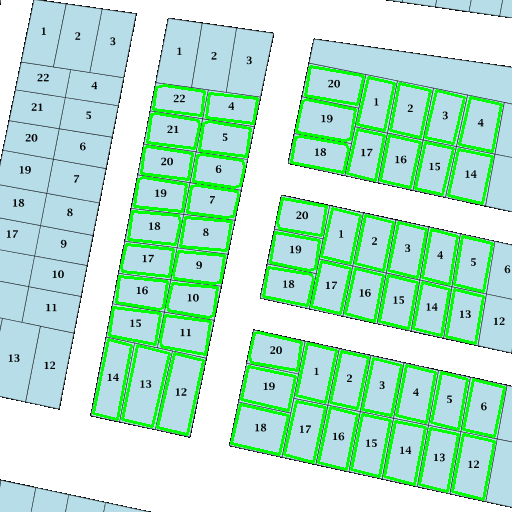

[[[239  30]]

 [[271  35]]

 [[258  94]]

 [[228  89]]]
len=  4


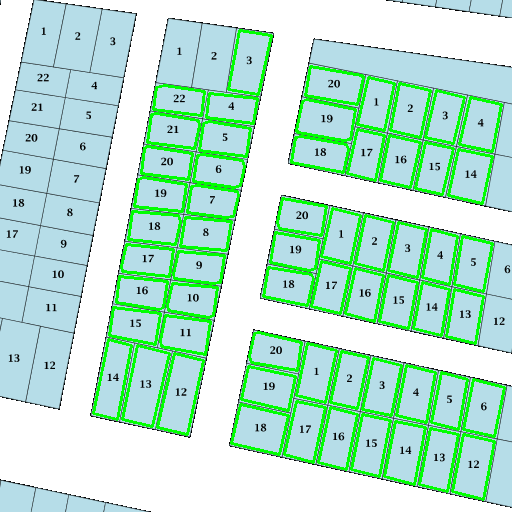

[[[204  25]]

 [[233  30]]

 [[223  89]]

 [[194  84]]]
len=  4


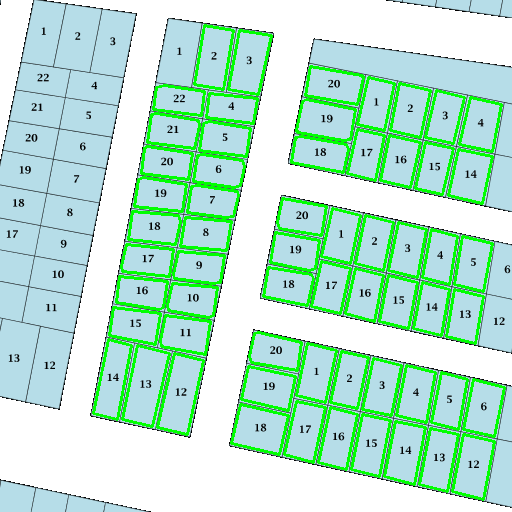

[[[170  20]]

 [[199  25]]

 [[189  84]]

 [[158  80]]]
len=  4


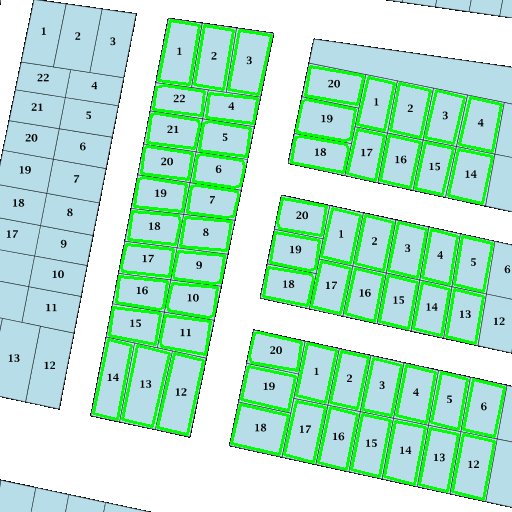

[[[ 42 328]]

 [[ 71 335]]

 [[ 56 406]]

 [[ 28 399]]]
len=  4


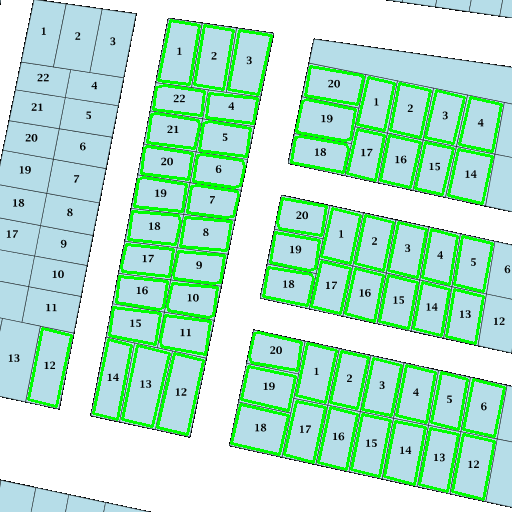

[[[ 30 290]]

 [[ 76 297]]

 [[ 78 301]]

 [[ 72 329]]

 [[ 25 320]]]
len=  5


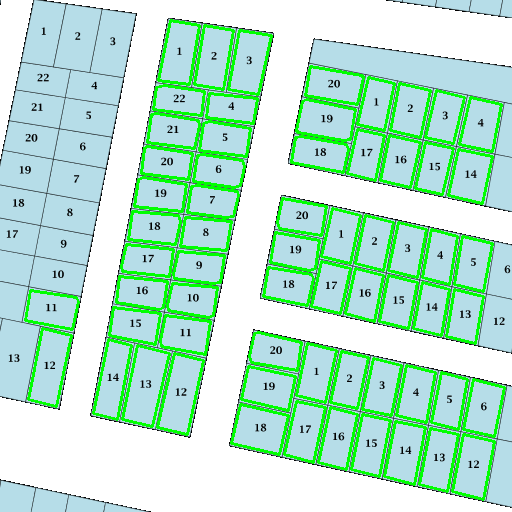

[[[ 35 260]]

 [[ 38 258]]

 [[ 82 266]]

 [[ 84 270]]

 [[ 80 291]]

 [[ 74 293]]

 [[ 32 285]]]
len=  7


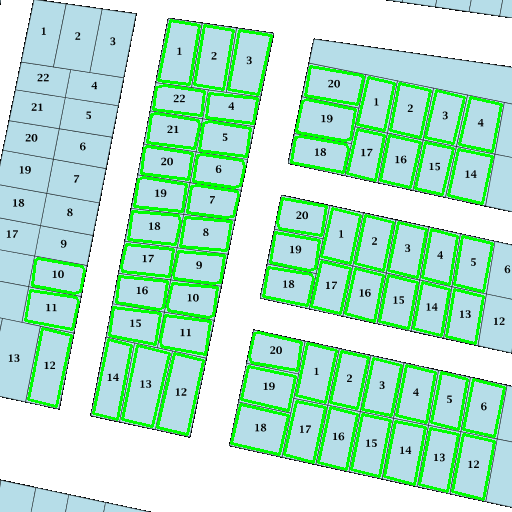

[[[ 41 229]]

 [[ 46 228]]

 [[ 88 236]]

 [[ 90 240]]

 [[ 86 260]]

 [[ 79 262]]

 [[ 38 254]]]
len=  7


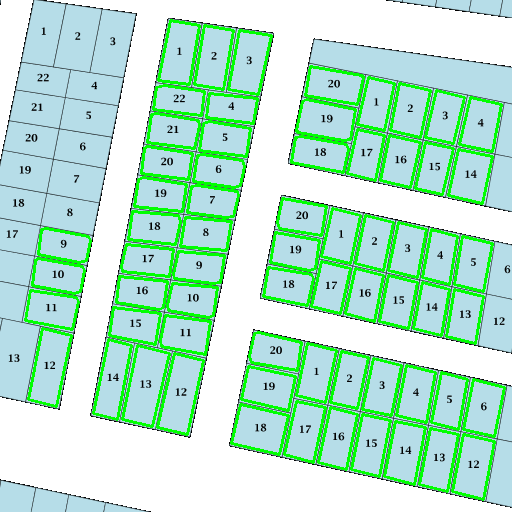

[[[ 48 197]]

 [[ 54 196]]

 [[ 95 204]]

 [[ 96 209]]

 [[ 91 231]]

 [[ 86 232]]

 [[ 44 224]]

 [[ 43 219]]]
len=  8


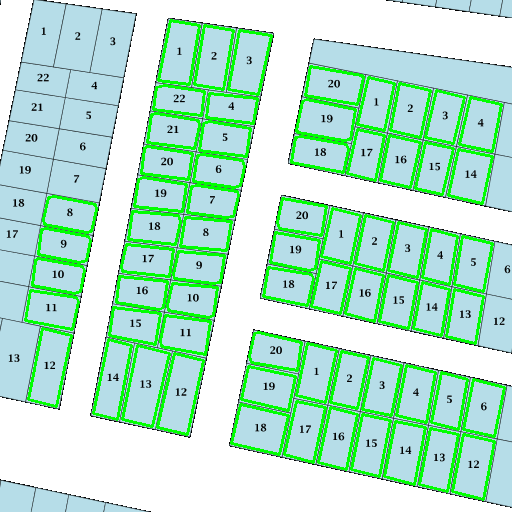

[[[ 54 162]]

 [[101 169]]

 [[103 173]]

 [[ 98 199]]

 [[ 51 192]]

 [[ 49 188]]]
len=  6


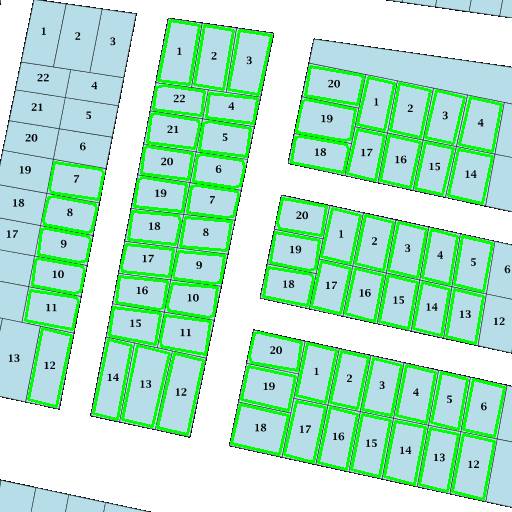

[[[ 60 132]]

 [[ 65 131]]

 [[108 138]]

 [[105 163]]

 [[ 98 165]]

 [[ 57 157]]

 [[ 56 152]]]
len=  7


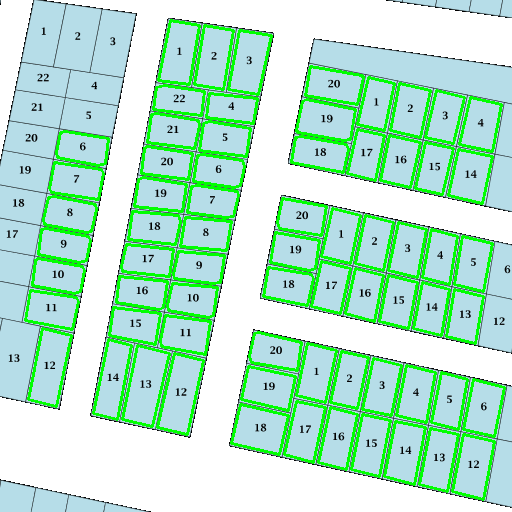

[[[ 10 124]]

 [[ 15 123]]

 [[ 55 130]]

 [[ 52 154]]

 [[ 47 156]]

 [[  6 148]]]
len=  6


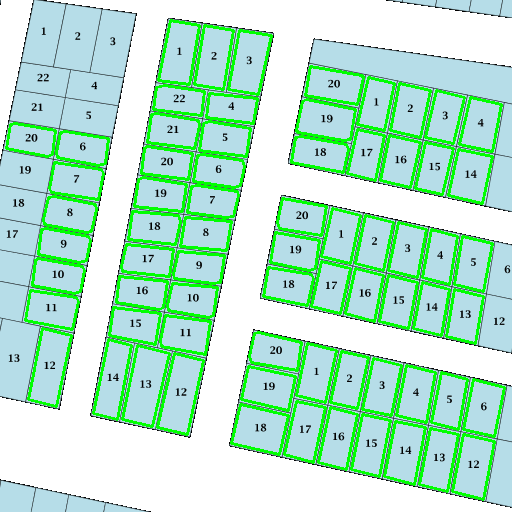

[[[ 66 101]]

 [[ 73 100]]

 [[114 107]]

 [[111 132]]

 [[105 134]]

 [[ 62 127]]]
len=  6


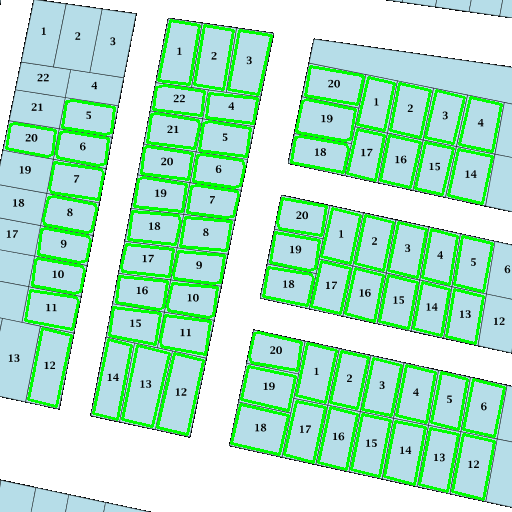

[[[ 16  93]]

 [[ 21  92]]

 [[ 60  98]]

 [[ 62 102]]

 [[ 57 125]]

 [[ 12 119]]]
len=  6


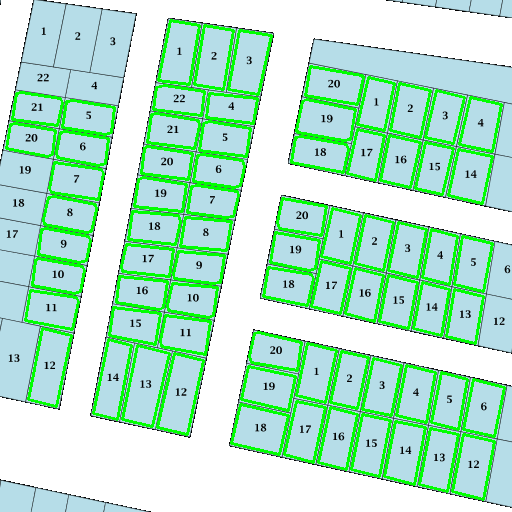

[[[ 72  73]]

 [[ 78  72]]

 [[120  79]]

 [[117 101]]

 [[114 103]]

 [[ 69  96]]

 [[ 68  89]]]
len=  7


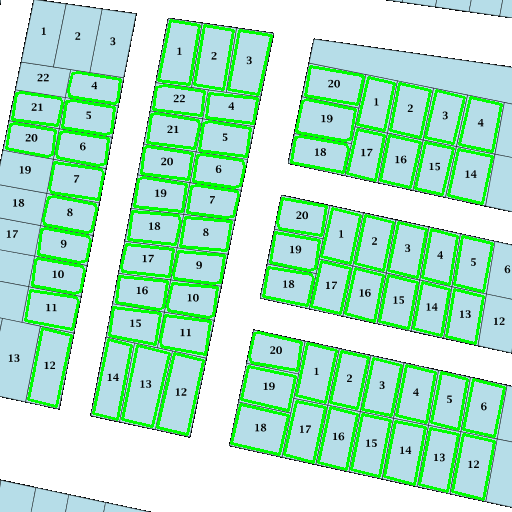

[[[22 65]]

 [[65 70]]

 [[67 76]]

 [[64 92]]

 [[62 94]]

 [[18 88]]]
len=  6


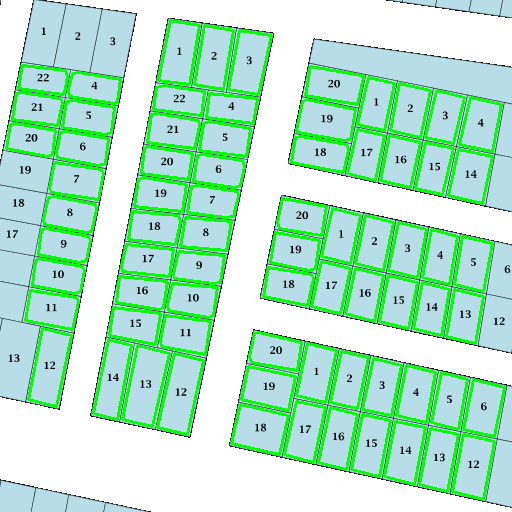

[[[104  11]]

 [[133  16]]

 [[121  75]]

 [[ 92  69]]]
len=  4


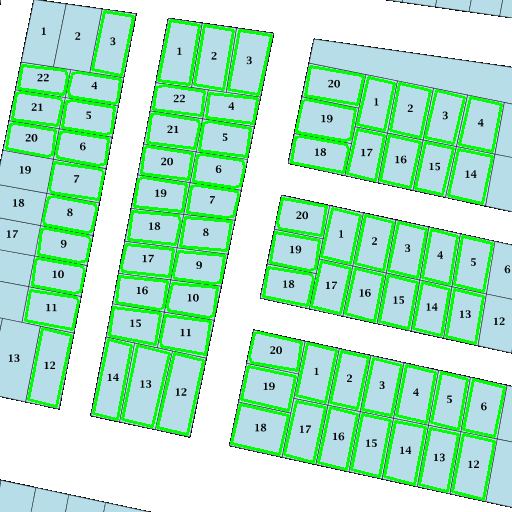

[[[68  6]]

 [[99 11]]

 [[87 70]]

 [[56 64]]]
len=  4


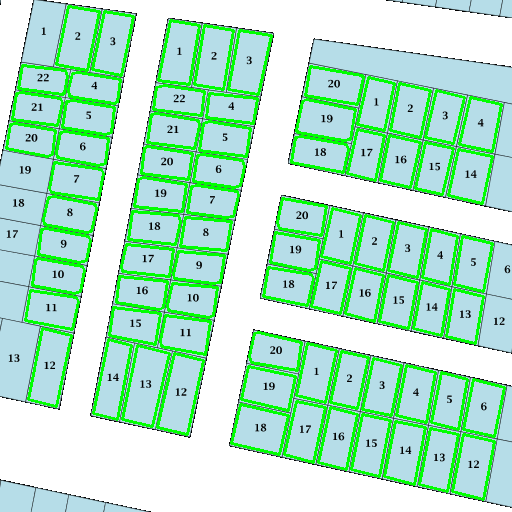

[[[36  1]]

 [[63  6]]

 [[50 64]]

 [[23 59]]]
len=  4


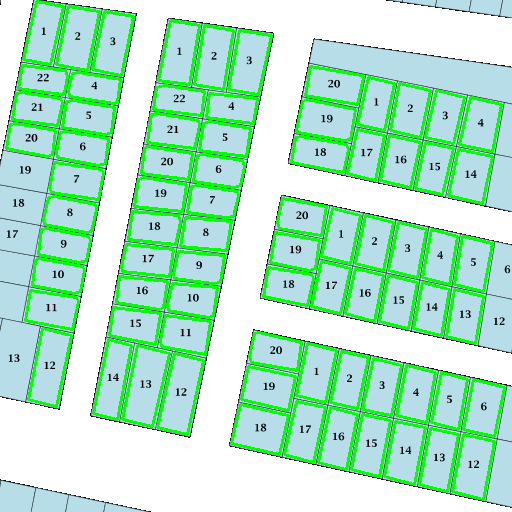

In [37]:
i = 0
for cnt in contours:
  i+=1
  if not checkPolygon(cnt, hierarchy[0][i-1]):
    continue
    
  approx = aprroxPolygons(cnt) #aproxima el poligono para reducir puntos
  #polygons(cnt) #mayor precisión pero más puntos
    
